<a href="https://colab.research.google.com/github/nnajeh/Pretrained-models/blob/main/Chest-X-ray-OpenI-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Import Libraries

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
#@title Dimension of our images


In [3]:
img_width, img_height = 299, 299

In [ ]:
#@title Location of datasets


In [9]:
train_data_dir = '/content/drive/MyDrive/Data/OpenI/Open_I_abd_vs_CXRs/TRAIN' #location of training data

validation_data_dir = '/content/drive/MyDrive/Data/OpenI/Open_I_abd_vs_CXRs/VAL' #location of validation data

In [ ]:
#@title number of samples used for determining the samples_per_epoch



In [10]:
nb_train_samples = 65
nb_validation_samples = 10

epochs = 20
batch_size = 5 

In [ ]:
#@title Data-Generation of training and validation data


In [11]:
train_datagen = ImageDataGenerator (rescale=1./255,   # normalize pixel values to [0,1],
                                    shear_range=0.2,      
                                    zoom_range=0.2,    
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True) 

In [12]:
val_datagen = ImageDataGenerator (rescale=1./255)       # normalize pixel values to [0,1]

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 65 images belonging to 2 classes.


In [14]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 10 images belonging to 2 classes.


In [ ]:
#@title Define model


In [15]:
#Use InceptionV3 model ^retrained on Imagenet as the backbone model
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

87916544/87910968 [==============================] - 0s 0us/step


In [16]:
model_top=Sequential()

In [17]:
model_top.add(GlobalAveragePooling2D(input_shape=base_model.output_shape[1:], data_format=None))

In [18]:
model_top.add(Dense(256, activation='relu'))

In [19]:
model_top.add(Dropout(0.5))

In [20]:
model_top.add(Dense(1, activation='sigmoid')) 

In [21]:
model = Model(inputs=base_model.input, outputs=model_top(base_model.output))

In [22]:
#compile the model
model.compile(optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08,decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 85s 6s/step - loss: 0.6290 - accuracy: 0.6209 - val_loss: 0.8332 - val_accuracy: 0.5000
Epoch 2/20
13/13 [==============================] - 62s 5s/step - loss: 0.2150 - accuracy: 0.9349 - val_loss: 0.3258 - val_accuracy: 0.8000
Epoch 3/20
13/13 [==============================] - 61s 5s/step - loss: 0.3267 - accuracy: 0.8117 - val_loss: 0.1529 - val_accuracy: 1.0000
Epoch 4/20
13/13 [==============================] - 62s 5s/step - loss: 0.0438 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 5/20
13/13 [==============================] - 61s 5s/step - loss: 0.3798 - accuracy: 0.8929 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 62s 5s/step - loss: 0.2394 - accuracy: 0.9135 - val_loss: 0.0595 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 61s 5s/step - loss: 0.1658 - accuracy: 0.9238 - val_loss: 0.1419 - val_accuracy: 1.0000
Epoch 8/20
13/13 [==

In [24]:
import matplotlib.pyplot as plt

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


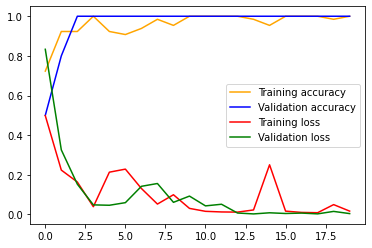

In [25]:
plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()

In [26]:

import numpy as np
from keras.preprocessing import image

In [28]:
img_path='/content/drive/MyDrive/Data/OpenI/Open_I_abd_vs_CXRs/TEST/chest2.png' #change to location of chest x-ray
img_path2='/content/drive/MyDrive/Data/OpenI/Open_I_abd_vs_CXRs/TEST/abd2.png'  #change to location of abd x-ray
img = image.load_img(img_path, target_size=(img_width, img_height))
img2 = image.load_img(img_path2, target_size=(img_width, img_height))


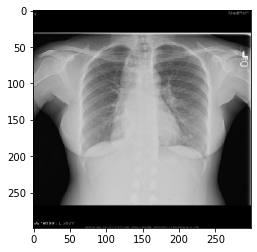

In [29]:
plt.imshow(img)
plt.show()


In [30]:
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'Chest X-ray' if score < 0.5 else 'Abd X-ray')

Predicted: [[5.1895217e-06]] Chest X-ray


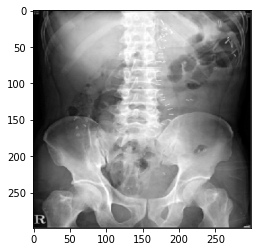

In [31]:
plt.imshow(img2)
plt.show()

In [32]:
img2 = image.img_to_array(img2)
x = np.expand_dims(img2, axis=0) * 1./255
score2 = model.predict(x)
print('Predicted:', score2, 'Chest X-ray' if score2 < 0.5 else 'Abd X-ray')

Predicted: [[0.99991655]] Abd X-ray
